# Evaluating a lext image

The evaluation of lext images can be performed just the same as the images recorded with the other methods (if you have not had a look on the other example check the other one first). However, the lext images have a much higher number of data points compared to the images recorded using e.g. self-imaging. This considerably slows down the calculations (loading the data, cropping the data, fitting the data ...). Therefore, there are a few things to consider.

### 1) saving the data as numpy file
In order to increase the speed when loading the data, the .xyz can be at first converted to a binary numpy file using `convert_xyz_to_npy()`. However, this only makes sense if the data is loaded more than once because the conversion takes the same amount as directly loading the data. Then, instead of using `ImageData.from_txt()` you have to use `ImageData.from_npy()`.

In [1]:
import os

import tipeval as te

input_file = '..\examples\lext_image.xyz'

if not os.path.exists('results'):
    os.mkdir('results')
    
te.convert_xyz_to_npy(input_file)
image = te.ImageData.from_npy('..\examples\lext_image.npy', 'self_imaging', unit='m', output_file='output_example.h5')

### 2) limiting the tip after loading
Subsequent calculations and especially the data selection with the user interface may take really long with the whole dataset. Since the lext-image typically covers a larger depth of the tip, it might be useful to directly limit the data used for the subsequent evaluation. This can be done **after** converting the data with `convert_data()` employing the `limit_z()` method. This method takes a limit and then crops the data ensuring that enough data is left such that the complete cross section for this limit is preserved.

In [2]:
image.convert_data(new_unit='nm')
image.limit_z(limit=500)
image.close()

The rest is essentially the same.

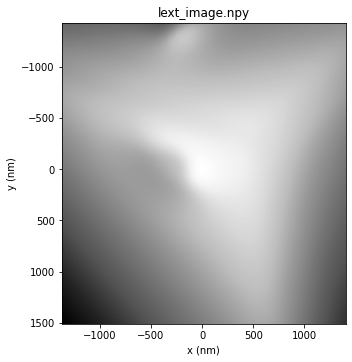

In [3]:
im1 = te.ImagePlot.from_hdf(image.output_file)
im1.save()

Sobel images often don't work so well with lext-images due to some debris on the surface that causes large local changes in the measured height. 

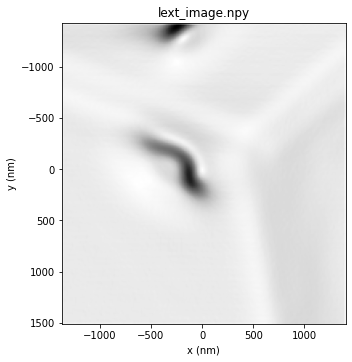

In [5]:
im2 = te.SobelPlot.from_hdf(image.output_file)
im2.save()

### Choosing the data for fitting
For choosing the data the same GUI can be used. However, it is very slow if you do not crop the data to a smaller range using `limit_z()`, especially when dragging the iso-line. The better way is in this case to manually type the required minimum and maximum values in the "Current iso level" line edit and click on the "Set level" button and wait. If you are satisfied with the chosen iso-level, you can click on the respective arrows to set the min/max values. However, if the image has been cropped to a reasonable range 

In [6]:
te.run_data_selection('output_example.h5')